In [1]:
import random
from sklearn import preprocessing
test_size = 80
test_list = random.sample(range(0, 500), test_size)
test_list.sort()

In [2]:
import functions

In [3]:
import csv

train_matrix = []
test_matrix = []
train_label = []
test_label = []

with open('dataset/Admission_Predict_data/Admission_Predict_Ver1.1.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader) # title
    index_test_list = 0
    index_row_list = 0
    for row in reader:
        train_row = []
        for i in range(1, len(row) - 1):
            train_row.append(float(row[i]))
        test_row = float(row[-1])
#         test_row = int(round(test_row * 10))
        
        if index_test_list < test_size and test_list[index_test_list] == index_row_list:
            test_matrix.append(train_row)
            test_label.append(test_row)
            index_test_list += 1
        else:
            train_matrix.append(train_row)
            train_label.append(test_row)
        index_row_list += 1
        

## Linear Regression Model



In [4]:
import numpy as np
x = np.array(train_matrix)
x = preprocessing.scale(x) # normalize
y = np.array(train_label)
x_test = np.array(test_matrix)
x_test = preprocessing.scale(x_test) # normalize

In [5]:
from sklearn.model_selection import KFold

def cross_val(data, label, model):
    kfold = KFold(n_splits = 5, shuffle = False)
    index = kfold.split(X = data, y = label)
    cross_val_error = []
    for train_index, test_index in index:
        model.fit(data[train_index], label[train_index]) # train
        y_pred = model.predict(data[test_index]) # predict
        error = functions.RSS(y_pred, label[test_index]) # error
        cross_val_error.append(error)
    exp_error = sum(cross_val_error)/len(cross_val_error)
    return exp_error

In [35]:
from sklearn import datasets, linear_model
from sklearn import linear_model
# define regression model
regression_model = linear_model.LinearRegression()

# method = 2 # 0 if regression, 1 if ridge, 2 if lasso

def regression_functions(method):
    if method == 0:
        return cross_val(x, y, regression_model)
    elif method == 1:
        alpha = np.linspace(0.00000001, 0.003, 1000)
        error = []
        for a in alpha:
            # define ridge model
            reg = linear_model.Ridge(alpha = a)
            error.append(cross_val(x, y, reg))
        return alpha, error, min(error), max(error)
    elif method == 2:
        alpha = np.linspace(0.00000001, 0.003, 1000)
        error = []
        for a in alpha:
            # define ridge model
            reg = linear_model.Lasso(alpha = a)
            error.append(cross_val(x, y, reg))
        return alpha, error, min(error), max(error)

In [36]:
for i in range(3):
    output = regression_functions(i)
    if i == 0:
        regression_error = output
    elif i == 1:
        ridge_alpha = output[0]
        ridge_error = output[1]
        ridge_min_error = output[2]
        ridge_max_error = output[3]
    elif i == 2:
        lasso_alpha = output[0]
        lasso_error = output[1]
        lasso_min_error = output[2]
        lasso_max_error = output[3]

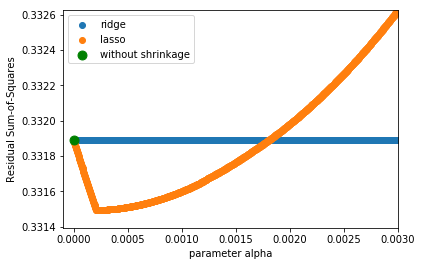

min error without shrinkage: 0.33188785084726535
ridge min error: 0.33188785084770484
lasso min error: 0.3314929781529935
lasso parameter alpha: 0.0002162254954954955


In [38]:
import matplotlib.pyplot as plt
import math

plt.scatter(ridge_alpha, ridge_error, label = "ridge")
plt.scatter(lasso_alpha, lasso_error, label = "lasso")
plt.scatter(0, regression_error, c = 'g', s = 80, label = "without shrinkage")
plt.legend()
plt.xlim((-0.0001, 0.003))
plt.ylim((min(lasso_error) - 0.0001, max(lasso_error)))
plt.xlabel('parameter alpha')
plt.ylabel('Residual Sum-of-Squares')
plt.show()


print('min error without shrinkage:', regression_error)
print('ridge min error:', min(ridge_error))
print('lasso min error:', min(lasso_error))
print('lasso parameter alpha:', lasso_alpha[lasso_error.index(min(lasso_error))])


In [40]:
from sklearn.metrics import r2_score
reg = linear_model.Lasso(alpha = lasso_alpha[lasso_error.index(min(lasso_error))])
kfold = KFold(n_splits = 5, shuffle = False)
index = kfold.split(X = x, y = y)
for train_index, test_index in index:
    reg.fit(x[train_index], y[train_index]) # train
    y_pred = reg.predict(x[test_index]) # predict
    accuracy = r2_score(list(y_pred), list(y[test_index]))
print(accuracy)

0.8705750249947922
